과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()

In [3]:
#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

- About data : https://www.kaggle.com/uciml/iris

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### 데이터 split하고 scaling

In [20]:
ss = StandardScaler()    # X scaling
X_train2 = ss.fit_transform(X_train)
X_test2 = ss.fit_transform(X_test)

In [27]:
# build KNN model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [28]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
# scale 된 데이터에 train 된 model
knn.fit(X_train2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 0, 2, 2, 1])

In [23]:
# get the predict(y_pred) from X_test2
y_pred2 = knn.predict(X_test2)
y_pred2

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 2, 0, 0, 2, 2, 1])

In [10]:
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


In [33]:
# 스케일링 된 데이터 사용 , score
print('accuracy: ', knn.score(X_test2, y_test))

accuracy:  0.9333333333333333


***

## KNN에 Grid Search 사용

In [34]:
# 일반적인 경고 메세지 무시
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],    
    'metric':['euclidean','manhattan']
}

# 이웃보는 갯수 : 3,5,11,19개
# 가중치 uniform,distance 
# 거리 측정 방식 : euclidean,manhattan

In [48]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,     # 파라미터
    verbose = 1,
    cv = 3,           # 3 fold cross validation
    n_jobs = -1
    )

gs_results = gs.fit(X_train2,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.0s finished


In [ ]:
# Fitting 3 folds for each of 16 candidates, totalling 48 fits
# 4*2*2 로 16가지 경우의 수 판단.

In [44]:
# 가장 좋은 결과를 얻는 그리드 출력
print("Best Parameter:{}".format(gs.best_params_))

Best Parameter:{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [46]:
# grid_Search의 최종 스코어 출력
print("Best Cross_validity Score :{:.3f}".format(gs.best_score_))

Best Cross_validity Score :0.958


In [53]:
# Test 데이터에 대해 grid_search 알고리즘 적용함.
print("Test set Score:{:.3f}".format(gs.score(X_test2,y_test)))

Test set Score:0.967


위에서 KNN의 n값을 3으로 지정한 것 보다 Grid Search를 통해 찾은 n값을 적용했을 때 score 값이 더 높아짐을 확인할 수 있다.

accuracy:  0.9333333333333333 -> 0.967

In [54]:
result_grid = pd.DataFrame(gs_results.cv_results_)

In [56]:
result_grid.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000998,0.000001,0.001330,0.00047,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.925,0.95,0.95,0.941667,0.011785,9
1,0.000333,0.000471,0.001661,0.00047,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.925,0.95,0.95,0.941667,0.011785,9
2,0.000997,0.000001,0.001662,0.00047,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.925,0.95,0.95,0.941667,0.011785,9


### n_neighbors만 고려 (방법 제외)

In [59]:
# GridSearch 의 범위 지정 : 1~15으로 지정함.
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [60]:
# KNN 알고리즘에 GridSearch를 적용함.
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,return_train_score=True)

## return_train_score는 True 해줘야 그래프 그려서 비교 가능

# Train 데이터에 GridSearch를 적용함.
grid_search.fit(X_train2,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [61]:
# 가장 좋은 결과를 얻는 그리드 출력함.
print("Best_Parameter:{}".format(grid_search.best_params_))

# grid search 의 최종 스코어를 출력함
print("Best Cross-validity Score:{:.3f}".format(grid_search.best_score_))

Best_Parameter:{'n_neighbors': 3}
Best Cross-validity Score:0.958


In [62]:
# Test 데이터에 대해 grid_search 알고리즘 적용함
print("Test set Score:{:,.3f}".format(grid_search.score(X_test2,y_test)))

Test set Score:0.933


In [63]:
result_grid2 = pd.DataFrame(grid_search.cv_results_)

In [64]:
result_grid2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000997,0.000631,0.001196,3.801265e-04,1,{'n_neighbors': 1},0.916667,0.875000,1.000000,0.916667,...,0.933333,0.042492,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000805,0.000403,0.000998,5.955694e-07,2,{'n_neighbors': 2},0.916667,0.916667,0.958333,0.958333,...,0.941667,0.020412,7,0.958333,0.989583,0.968750,0.968750,0.979167,0.972917,0.010623
2,0.000405,0.000497,0.000998,1.340243e-06,3,{'n_neighbors': 3},0.916667,0.958333,1.000000,0.958333,...,0.958333,0.026352,1,0.958333,0.979167,0.958333,0.968750,0.958333,0.964583,0.008333
3,0.000400,0.000490,0.000792,3.960782e-04,4,{'n_neighbors': 4},0.916667,0.916667,0.958333,0.958333,...,0.941667,0.020412,7,0.968750,0.979167,0.958333,0.979167,0.979167,0.972917,0.008333
4,0.000399,0.000489,0.000798,3.992083e-04,5,{'n_neighbors': 5},0.916667,0.916667,1.000000,0.916667,...,0.941667,0.033333,7,0.968750,0.989583,0.958333,0.989583,0.979167,0.977083,0.012148
5,0.000799,0.000399,0.000606,4.948922e-04,6,{'n_neighbors': 6},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,3,0.958333,0.958333,0.947917,0.947917,0.958333,0.954167,0.005103
6,0.000400,0.000490,0.000805,4.029057e-04,7,{'n_neighbors': 7},0.916667,0.916667,1.000000,0.916667,...,0.941667,0.033333,7,0.958333,0.968750,0.937500,0.968750,0.968750,0.960417,0.012148
7,0.000200,0.000399,0.000997,3.462902e-06,8,{'n_neighbors': 8},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,3,0.968750,0.968750,0.937500,0.958333,0.979167,0.962500,0.014130
8,0.000199,0.000399,0.000793,3.964032e-04,9,{'n_neighbors': 9},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,3,0.958333,0.979167,0.947917,0.968750,0.979167,0.966667,0.012148
9,0.000399,0.000488,0.000798,3.988266e-04,10,{'n_neighbors': 10},0.875000,0.916667,1.000000,0.958333,...,0.941667,0.042492,7,0.958333,0.968750,0.937500,0.968750,0.958333,0.958333,0.011411


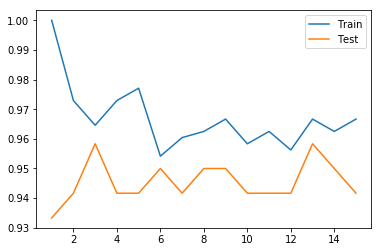

In [66]:
# n-neighbors에 따른 비교
## n 의 갯수에 따른 비교
import matplotlib.pyplot as plt
plt.plot(result_grid2['param_n_neighbors'],result_grid2['mean_train_score'],label="Train")
plt.plot(result_grid2['param_n_neighbors'],result_grid2['mean_test_score'],label="Test")
plt.legend()